#1. 導入必要的庫

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#2. 載入鳶尾花數據集

In [14]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#3. 數據預處理

##將數據集分為訓練集和測試集
test: 30%

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##標準化特徵值

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#4. 訓練SVM模型

##核函數選用

###使用Linear Kernal

In [5]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

###polynomial Kernal

In [17]:
svm = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

##模型評估

In [18]:
y_pred = svm.predict(X_test)

##打印混淆矩陣和分類報告

In [19]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  2 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#5. 可視化結果（僅限於2D情況）

##由於Iris數據集有四個特徵，我們選擇其中兩個特徵進行可視化

In [20]:
X_vis = X[:, :2]  # 只選擇前兩個特徵
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

##訓練新的SVM模型

In [21]:
svm_vis = SVC(kernel='linear', C=1.0, random_state=42)
svm_vis.fit(X_train_vis, y_train_vis)

SVC(kernel='linear', random_state=42)

In [22]:
svm_vis = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_vis.fit(X_train_vis, y_train_vis)

SVC(kernel='poly', random_state=42)

##創建網格來顯示決策邊界

In [23]:
h = .02  # 網格步長
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

##預測網格點

In [24]:
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

##繪製決策邊界和訓練樣本

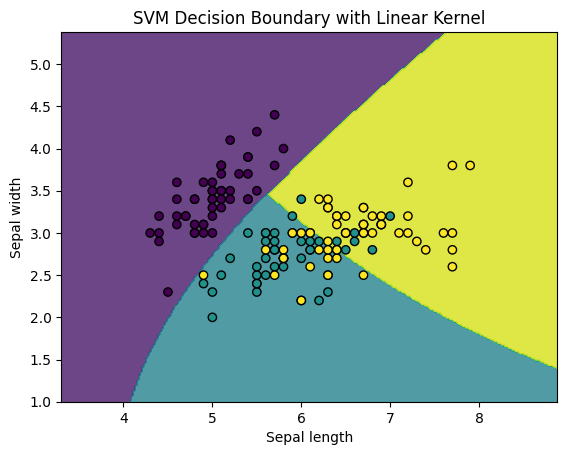

In [25]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.show()